# Making Business Decisions Based on Data Project

## Introduction

The purpose of this project is to look for ways to boost revenue for an online store.<br>
For this sake I need to prioritize list of hypotheses (compiled with the help of Marketing department), launch an A/B test and analyze the results.<br>
The project is divided into two parts: in the first the hypotheses are being prioritized with the help of two different frameworks, and the second part includes analysis of the chosen hypothesis.

## Table of Contents

1. **Part 1. Prioritizing Hypotheses**
    * 1.1 [Load and preprocess the data](#1.1-Load-and-preprocess-the-data)
    * 1.2 [Apply the ICE framework](#1.2-Apply-the-ICE-Framework)
    * 1.3 [Apply the RICE framework](#1.3-Apply-the-RICE-Framework)
    * 1.4 [The difference between ICE and RICE. Conclusion](#1.4-The-Difference-Between-ICE-and-RICE:-Conclusion)
    
    
2. **A/B Test Analysis**. [Load and preprocess the data](#Load-and-preprocess-the-data)
    * 2.1 [Graph cumulative revenue by group](#2.1-Graph-cumulative-revenue-by-group.-Make-conclusions-and-conjectures.)
    * 2.2 [Graph cumulative average order size by group](#2.2-Graph-cumulative-average-order-size-by-group.-Make-conclusions-and-conjectures.)
    * 2.3 [Relative difference](#2.3-Relative-difference)
    * 2.4 [Conversion rates](#2.3-Conversion-rates)
    * 2.5 [Orders per user](#2.4-Orders-per-User)
    * 2.6 [Orders per user - define anomalous](#2.5-Define-anomalous-number-of-orders-per-user)
    * 2.7 [Orders' prices](#2.6-Orders'-prices)
    * 2.8 [Orders' prices - define anomalous](#Define-anomalous-order-prices)
    * 2.9 [Statistical significance of the difference in conversion (raw data)](#2.9-Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)
    * 2.10 [Statistical significance of the difference in average order size (raw data)](#2.10-Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)
    * 2.11 [Statistical significance of the difference in conversion (filtered data)](#2.11-Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)
    * 2.12 [Statistical significance of the difference in average order size (filtered data)](#2.12-Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)
    * 2.13 [Conclusion](#Make-a-decision-based-on-the-test-results.)

In [1]:
### Libraries cell
import pandas as pd
pd.set_option('max_colwidth', 450)

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import random
import seaborn as sns


# Part 1. Prioritizing Hypotheses

## 1.1 Load and preprocess the data

In [2]:
try:
    hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep = ';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
    
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
for column in hypotheses.columns:
    hypotheses = hypotheses.rename(columns = {column:column.lower()})
    
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


#### <font color = 'blue'>Notes:</font>
The dataset is very small, all the numeric values are already ints. No missing scores. I had only to change separator to ';' and convert column names to lowercase.

## 1.2 Apply the ICE Framework

ICE framework is a popular prioritization method. It's formula is: **(Impact * Reach) / Effort**.<br>
In this formula the assurance of the evaluation is represented by Confidence, the feature effect on the product is Impact, and the Effort is about the easiness of implementation.

In [4]:
hypotheses['ice'] = ((hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']).round(2)

In [5]:
hypotheses.sort_values(by = 'ice', ascending = False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


#### <font color = 'blue'>Notes:</font>

The top 3 hypotheses are:
* Launch a promotion that gives users discounts on their birthdays
* Add two new channels for attracting traffic. This will bring 30% more users
* Add a subscription form to all the main pages. This will help you compile a mailing list

## 1.3 Apply the RICE Framework

RICE is a prioritization method with the following formula: **(Reach * Impact * Confidence) / Effort**.<br>
Compared to the ICE metrics, it has additional scoring parameter 'Reach', which indicates how many users will be affected by a proposed change.

In [6]:
hypotheses['rice'] = (
    (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']).astype('int')

In [7]:
hypotheses.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3


#### <font color = 'blue'>Notes:</font>

The top 3 hypotheses are:
* Add a subscription form to all the main pages. This will help you compile a mailing list
* Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
* Add two new channels for attracting traffic. This will bring 30% more users

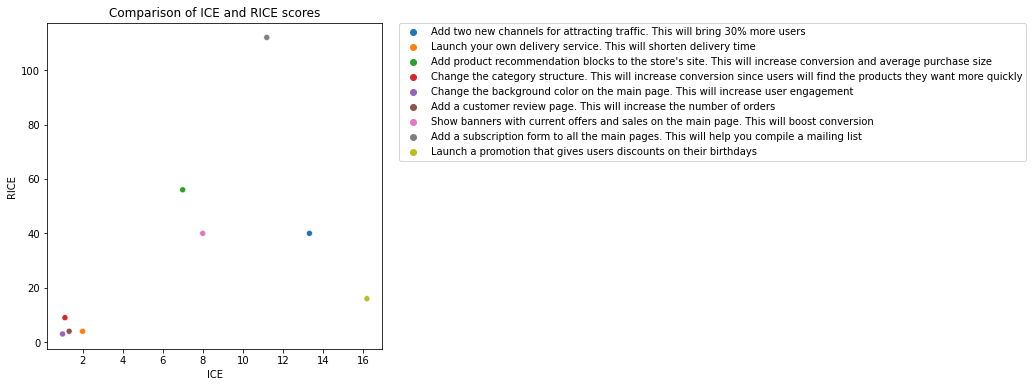

In [8]:
plt.figure(figsize = (6,6))
ax = sns.scatterplot(data = hypotheses, x = 'ice', y = 'rice', hue = 'hypothesis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.title('Comparison of ICE and RICE scores')
plt.show()

## 1.4 The Difference Between ICE and RICE: Conclusion

By the ICE framework, top 3 hypotheses are 8, 0 and 7.<br>
But when we take the reach into account and evaluate the hypotheses according to the RICE framework, top 3 hypotheses are 7, 2 and 0. <br>
Hypothesis 8, while having high (9 out of 10) scores for impact and confidence, has very low reach score (1/10) meaning it is estimated that very little number of users will be affected by such improvement. On the other hand, hypothesis 2, while having high reach score (7/10), has low impact (3/10) score, meaning while this improvement will reach many customers, it is not expected to affect their decisions significantly. 

 [Return to table of contents ^^^](#Table-of-Contents)

# Part 2. A/B Test Analysis

## Load and preprocess the data

In [9]:
try:
    orders_raw = pd.read_csv('datasets/orders_us.csv', parse_dates = ['date'])
    visits_raw = pd.read_csv('datasets/visits_us.csv', parse_dates = ['date'])
except:
    orders_raw = pd.read_csv('/datasets/orders_us.csv', parse_dates = ['date'])
    visits_raw = pd.read_csv('/datasets/visits_us.csv', parse_dates = ['date'])    

In [10]:
print(orders_raw.info())

orders_raw.describe(datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue
count,1.197000e+03,1.197000e+03,1197,1197.000000
mean,2.155621e+09,2.165960e+09,2019-08-15 13:06:46.015037696,131.491646
min,1.062393e+06,5.114589e+06,2019-08-01 00:00:00,5.000000
25%,1.166776e+09,1.111826e+09,2019-08-08 00:00:00,20.800000
50%,2.145194e+09,2.217985e+09,2019-08-15 00:00:00,50.200000
75%,3.237740e+09,3.177606e+09,2019-08-23 00:00:00,130.400000
max,4.293856e+09,4.283872e+09,2019-08-31 00:00:00,19920.400000
std,1.229085e+09,1.236014e+09,NaN,603.004729


In [11]:
print(visits_raw.info())

visits_raw.describe(datetime_is_numeric=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


,date,visits
count,62,62.000000
mean,2019-08-16 00:00:00,607.290323
min,2019-08-01 00:00:00,361.000000
25%,2019-08-08 06:00:00,534.000000
50%,2019-08-16 00:00:00,624.500000
75%,2019-08-23 18:00:00,710.500000
max,2019-08-31 00:00:00,770.000000
std,NaN,114.400560


In [12]:
orders_raw = orders_raw.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [13]:
orders_raw.head(3)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


In [14]:
visits_raw.head(3)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [15]:
# check for duplicates:
print('Number of duplicated rows in orders dataframe is:', orders_raw.duplicated().sum())
print('Number of duplicated rows in visits dataframe is:', visits_raw.duplicated().sum())

Number of duplicated rows in orders dataframe is: 0
Number of duplicated rows in visits dataframe is: 0


In [16]:
# check for duplicated transactions:
orders_raw.transaction_id.duplicated().sum()

0

In [17]:
# check group sizes:
print('Group A size is {}'.format(len(orders_raw.query('group == "A"'))))
print('Group B size is {}'.format(len(orders_raw.query('group == "B"'))))

Group A size is 557
Group B size is 640


In [18]:
# ratio between group sizes:
len(orders_raw.query('group == "A"')) / len(orders_raw.query('group == "B"')) 

0.8703125

In [19]:
# check how many users appear in both groups:
print('Total users appearing in both groups: {}'.format(
    len(orders_raw[(orders_raw['group'] == 'A') & 
                   (orders_raw['visitor_id'].isin(orders_raw[orders_raw['group'] == 'B']['visitor_id']))])))

print('Share of users appearing in both groups: {:.2%}'.format(
    len(orders_raw[(orders_raw['group'] == 'A') & 
                   (orders_raw['visitor_id'].isin(orders_raw[orders_raw['group'] == 'B']['visitor_id']))]) / 
    len(orders_raw)))


Total users appearing in both groups: 89
Share of users appearing in both groups: 7.44%


In [20]:
duplicated_users = orders_raw[(orders_raw['group'] == 'A') & 
                   (orders_raw['visitor_id'].isin(orders_raw[orders_raw['group'] == 'B']['visitor_id']))]['visitor_id']

In [21]:
# drop rows with visitors belonging to both groups:
orders_raw = orders_raw.query('visitor_id not in @duplicated_users')
orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


#### <font color = 'blue'>Notes:</font>

In this section I preprocessed the data and checked it for possible mistakes, with following results:
* The columns with upper string were renamed.
* Datetime columns were converted to the right type.
* There was no missing values and duplicated rows.
* The size of group A is smaller than the size of group B (their ratio is 0.87).
* 7.44% of visitors belonged to both groups and I removed them from the dataset.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.1 Graph cumulative revenue by group. Make conclusions and conjectures.

In [22]:
# make cumulative data table

# build an array with unique paired date-group values:
dates_groups = orders_raw[['date', 'group']].drop_duplicates()

# get an aggregated cumulative daily data on orders:
orders_aggregated = dates_groups.apply(
    lambda x: orders_raw[np.logical_and(orders_raw['date'] <= x['date'], orders_raw['group'] == x['group']
                                       )].agg({
        'date' : 'max', 
        'group' : 'max', 
        'transaction_id' : pd.Series.nunique, 
        'visitor_id' : pd.Series.nunique, 
        'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])

orders_aggregated = orders_aggregated.merge(visits_raw, on = ['date', 'group'])

orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

orders_aggregated.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,619
3,2019-08-02,B,40,39,3535.3,581
4,2019-08-03,A,66,60,5550.1,507


In [23]:
# split groups A and B into two separate datasets:

orders_a = orders_aggregated.query('group == "A"').sort_values(by = 'date').reset_index()
orders_b = orders_aggregated.query('group == "B"').sort_values(by = 'date').reset_index()

In [24]:
orders_a.head()

,index,date,group,orders,buyers,revenue,visits
0,0,2019-08-01,A,23,19,2266.6,719
1,2,2019-08-02,A,42,36,3734.9,619
2,4,2019-08-03,A,66,60,5550.1,507
3,6,2019-08-04,A,77,71,6225.6,717
4,8,2019-08-05,A,99,92,7623.6,756


In [25]:
orders_b.head()

,index,date,group,orders,buyers,revenue,visits
0,1,2019-08-01,B,17,17,967.2,713
1,3,2019-08-02,B,40,39,3535.3,581
2,5,2019-08-03,B,54,53,4606.9,509
3,7,2019-08-04,B,68,66,6138.5,770
4,9,2019-08-05,B,89,87,7587.8,707


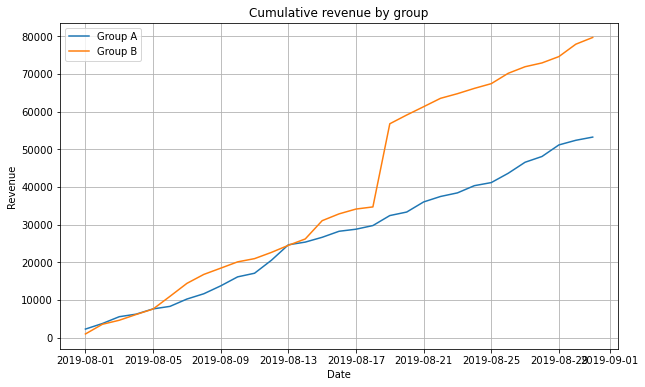

In [26]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(orders_a['date'].to_numpy(), orders_a['revenue'], label='Group A')
plt.plot(orders_b['date'].to_numpy(), orders_b['revenue'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Cumulative revenue by group')
plt.legend()
plt.grid()
plt.show()

#### <font color = 'blue'>Notes:</font>

* For the most time group B's revenue is higher.
* There can be seen a small peak for group A in 13.8 and a high rise for group B in 19.8, which could be result of some unusually high orders (outliers).

[Return to table of contents ^^^](#Table-of-Contents)

## 2.2 Graph cumulative average order size by group. Make conclusions and conjectures.

In [27]:
orders_a['avg_order'] = orders_a['revenue'] / orders_a['orders']
orders_b['avg_order'] = orders_b['revenue'] / orders_b['orders']

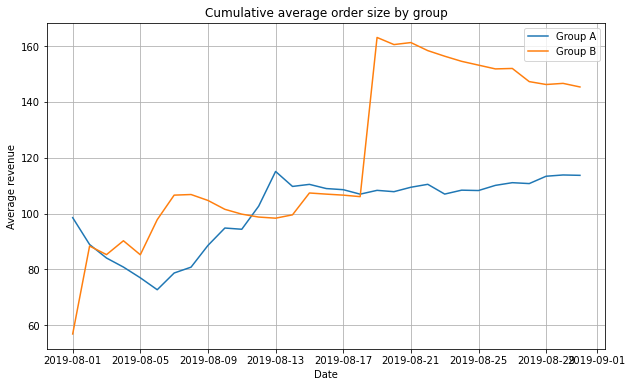

In [28]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(orders_a['date'], orders_a['avg_order'], label='Group A')
plt.plot(orders_b['date'], orders_b['avg_order'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Average revenue')
plt.title('Cumulative average order size by group')
plt.legend()
plt.grid()
plt.show()

#### <font color = 'blue'>Notes:</font>

* Group B's average revenue stabilized high above group A's at 19.8.
* There can be same irregularities in both graphs which may be explained by outliers.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.3 Relative difference
### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

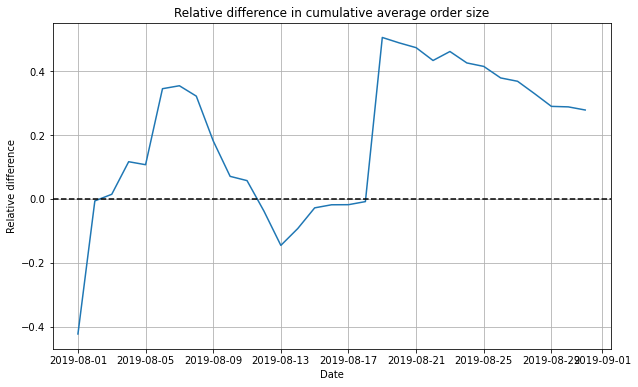

In [29]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(orders_a['date'], (orders_b['avg_order'] / orders_a['avg_order'] - 1))
plt.xlabel('Date')
plt.ylabel('Relative difference')
plt.title('Relative difference in cumulative average order size')
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.show()

#### <font color = 'blue'>Notes:</font>

* For the most part cumulative difference is positive, meaning that average orders in group B are larger. 
* At two points the difference between groups spikes, which points at possible outliers.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.4 Conversion rates
### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [30]:
# add cumulative visits count:
orders_a['cumul_visits'] = orders_a['visits'].cumsum()
orders_b['cumul_visits'] = orders_b['visits'].cumsum()

In [31]:
# add conversion columns:
orders_a['conversion'] = (orders_a['buyers'] / orders_a['cumul_visits']).round(3)
orders_b['conversion'] = (orders_b['buyers'] / orders_b['cumul_visits']).round(3)

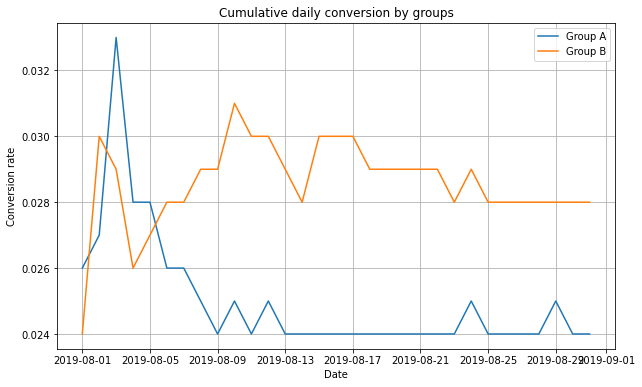

In [32]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(orders_a['date'], orders_a['conversion'], label='Group A')
plt.plot(orders_b['date'], orders_b['conversion'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.title('Cumulative daily conversion by groups')
plt.legend()
plt.grid()
plt.show()

#### <font color = 'blue'>Notes:</font>

* For the most time group B's conversion rates are higher.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.5 Orders per User
### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


In [33]:
orders_by_user = orders_raw.drop(['date', 'revenue'], axis = 1).groupby('visitor_id', as_index = False).agg({
    'transaction_id': pd.Series.nunique, 'group':'first'})

orders_by_user.columns = ['visitor_id', 'orders','group']

orders_by_user.sort_values('orders', ascending = False).head()

,visitor_id,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A


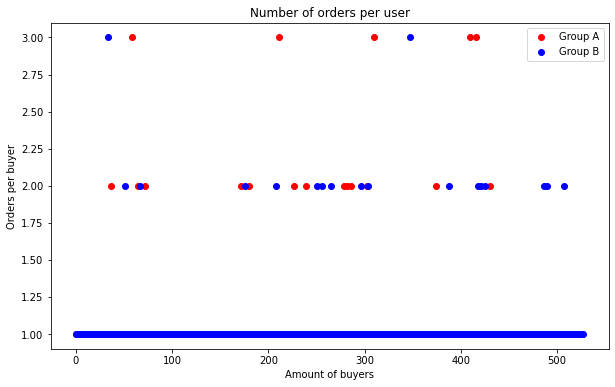

In [34]:
x_values_a = pd.Series(range(0, len(orders_by_user.query('group == "A"'))))
x_values_b = pd.Series(range(0, len(orders_by_user.query('group == "B"'))))


plt.scatter(x_values_a, orders_by_user.query('group == "A"')['orders'], c = 'red', label = 'Group A')
plt.scatter(x_values_b, orders_by_user.query('group == "B"')['orders'], c = 'blue', label = 'Group B')
plt.ylabel('Orders per buyer')
plt.xlabel('Amount of buyers')
plt.title('Number of orders per user')
plt.legend()
plt.show()

#### <font color = 'blue'>Notes:</font>

* Most of the users have only 1 order.
* Very little users have made 2 orders.
* Only 7 users made 3 orders.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.6 Define anomalous number of orders per user
### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [35]:
np.percentile(orders_by_user['orders'], [95, 99, 99.5])

array([1., 2., 3.])

#### <font color = 'blue'>Notes:</font>

* 95% of the users have made only one order.
* 99% of the users have made one or two orders.
* Users who made 3 orders are placed in highest 0.5 procentile.
* I will set regular amount of orders per user as 2, thus treating 3 orders per user as an anomaly.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.7 Orders' prices
### Plot a scatter chart of order prices. Make conclusions and conjectures.

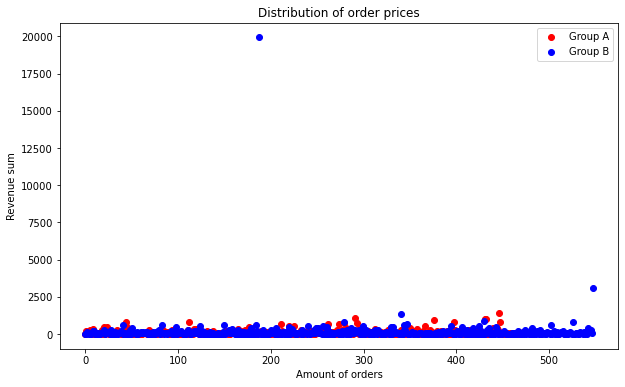

In [36]:
x_values_a2 = pd.Series(range(0, len(orders_raw.query('group == "A"'))))
x_values_b2 = pd.Series(range(0, len(orders_raw.query('group == "B"'))))


plt.scatter(x_values_a2, orders_raw.query('group == "A"')['revenue'], c = 'red', label = 'Group A') 
plt.scatter(x_values_b2, orders_raw.query('group == "B"')['revenue'], c = 'blue', label = 'Group B') 
plt.ylabel('Revenue sum')
plt.xlabel('Amount of orders')
plt.title('Distribution of order prices')
plt.legend()
plt.show()

#### <font color = 'blue'>Notes:</font>

* Most of the orders are below 1000.
* There are two single very high orders, one slightly above 2500 and another close to 20,000.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.8 Define anomalous order prices
### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [37]:
np.percentile(orders_raw['revenue'], [95, 98, 99])

array([414.275, 654.56 , 830.3  ])

#### <font color = 'blue'>Notes:</font>

* 95% of the orders are 414.28 or below.
* 98% of the orders are 655 or below.
* 99% of the orders are 830.3 or below.
* I will set regular sum of orders as 600, thus treating orders higher than 600 as an anomaly.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.9 Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


In [38]:
# create samples (non-cumulative) for the both groups:
sample_a1 = orders_raw.query('group == "A"').groupby('date').agg({
    'transaction_id':'count', 'visitor_id':'nunique', 'revenue':'sum'}).reset_index().merge(
    visits_raw.query('group == "A"')[['date', 'visits']], on = 'date')
sample_a1.columns = ['date', 'transactions', 'buyers', 'revenue', 'visits']

sample_b1 = orders_raw.query('group == "B"').groupby('date').agg({
    'transaction_id':'count', 'visitor_id':'nunique', 'revenue':'sum'}).reset_index().merge(
    visits_raw.query('group == "B"')[['date', 'visits']], on = 'date')
sample_b1.columns = ['date', 'transactions', 'buyers', 'revenue', 'visits']

In [39]:
# add conversion to both samples:
sample_a1['conversion'] = (sample_a1['buyers'] / sample_a1['visits']).round(3)
sample_b1['conversion'] = (sample_b1['buyers'] / sample_b1['visits']).round(3)

In [40]:
sample_a1.head()

,date,transactions,buyers,revenue,visits,conversion
0,2019-08-01,23,19,2266.6,719,0.026
1,2019-08-02,19,18,1468.3,619,0.029
2,2019-08-03,24,24,1815.2,507,0.047
3,2019-08-04,11,11,675.5,717,0.015
4,2019-08-05,22,22,1398.0,756,0.029


In [41]:
sample_b1.head()

,date,transactions,buyers,revenue,visits,conversion
0,2019-08-01,17,17,967.2,713,0.024
1,2019-08-02,23,22,2568.1,581,0.038
2,2019-08-03,14,14,1071.6,509,0.028
3,2019-08-04,14,13,1531.6,770,0.017
4,2019-08-05,21,21,1449.3,707,0.030


In [42]:
def testing_average(sample1, sample2, alpha = 0.05):
    # checking normality:
    stat1, p1_norm = st.shapiro(sample1)
    stat2, p2_norm = st.shapiro(sample2)
    
    # if both normal:
    if p1_norm > alpha and p2_norm > alpha: 
        
        #check variance:
        statslev, p_levene = st.levene(sample1, sample2)
        
        if p_levene < alpha: ## variances not equal ##
            statist, p_value = st.ttest_ind(sample1, sample2, equal_var = False)
        else: ## variances equal ##
            statist, p_value = st.ttest_ind(sample1, sample2, equal_var = True)
    
    else: ## at least one of samples not normal ##
        statist, p_value = st.mannwhitneyu(sample1, sample2)
        
    print('P-value is: ', p_value)
    
    if p_value < alpha:
        print('Reject H0. The samples are not equal.')
    else:
        print('Cannot reject H0. There is not enough evidence to determine that samples are not equal.')

In [43]:
testing_average(sample_a1['conversion'], sample_b1['conversion'])

P-value is:  0.018522972904671618
Reject H0. The samples are not equal.


#### <font color = 'blue'>Notes:</font>

* There is statistically significant difference between conversion rates in the raw data.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.10 Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [44]:
# add average order size to samples:

sample_a1['avg_purchase'] = (sample_a1['revenue'] / sample_a1['buyers']).round(2)
sample_b1['avg_purchase'] = (sample_b1['revenue'] / sample_b1['buyers']).round(2)

In [45]:
sample_a1.head()

,date,transactions,buyers,revenue,visits,conversion,avg_purchase
0,2019-08-01,23,19,2266.6,719,0.026,119.29
1,2019-08-02,19,18,1468.3,619,0.029,81.57
2,2019-08-03,24,24,1815.2,507,0.047,75.63
3,2019-08-04,11,11,675.5,717,0.015,61.41
4,2019-08-05,22,22,1398.0,756,0.029,63.55


In [46]:
sample_b1.head()

,date,transactions,buyers,revenue,visits,conversion,avg_purchase
0,2019-08-01,17,17,967.2,713,0.024,56.89
1,2019-08-02,23,22,2568.1,581,0.038,116.73
2,2019-08-03,14,14,1071.6,509,0.028,76.54
3,2019-08-04,14,13,1531.6,770,0.017,117.82
4,2019-08-05,21,21,1449.3,707,0.030,69.01


In [47]:
testing_average(sample_a1['avg_purchase'], sample_b1['avg_purchase'])

P-value is:  0.3571665273242294
Cannot reject H0. There is not enough evidence to determine that samples are not equal.


#### <font color = 'blue'>Notes:</font>

* The difference between average order sizes in the raw data is not statistically significant.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.11 Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [48]:
# create sample with abnormal buyers (with too many orders or who made too expensive ones),
# according to criteria set in parts 2.6 and 2.8
revenue_lim = 600
orders_lim = 2

users_with_many_orders = orders_by_user.query('orders > @orders_lim').visitor_id
users_with_expensive_orders = orders_raw.query('revenue > @revenue_lim').visitor_id
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0)

# create filtered data slice without those users:
orders_filtered = orders_raw[np.logical_not(orders_raw['visitor_id'].isin(abnormal_users))]

In [49]:
# create filtered samples for the both groups:
sample_a2 = orders_filtered.query('group == "A"').groupby('date').agg({
    'transaction_id':'count', 'visitor_id':'nunique', 'revenue':'sum'}).reset_index().merge(
    visits_raw.query('group == "A"')[['date', 'visits']], on = 'date')
sample_a2.columns = ['date', 'transactions', 'buyers', 'revenue', 'visits']

sample_b2 = orders_filtered.query('group == "B"').groupby('date').agg({
    'transaction_id':'count', 'visitor_id':'nunique', 'revenue':'sum'}).reset_index().merge(
    visits_raw.query('group == "B"')[['date', 'visits']], on = 'date')
sample_b2.columns = ['date', 'transactions', 'buyers', 'revenue', 'visits']

In [50]:
# add conversion to both samples:
sample_a2['conversion'] = (sample_a2['buyers'] / sample_a2['visits']).round(3)
sample_b2['conversion'] = (sample_b2['buyers'] / sample_b2['visits']).round(3)

In [51]:
sample_a2.head()

,date,transactions,buyers,revenue,visits,conversion
0,2019-08-01,18,17,1779.3,719,0.024
1,2019-08-02,18,17,1438.3,619,0.027
2,2019-08-03,24,24,1815.2,507,0.047
3,2019-08-04,11,11,675.5,717,0.015
4,2019-08-05,22,22,1398.0,756,0.029


In [52]:
sample_b2.head()

,date,transactions,buyers,revenue,visits,conversion
0,2019-08-01,17,17,967.2,713,0.024
1,2019-08-02,23,22,2568.1,581,0.038
2,2019-08-03,14,14,1071.6,509,0.028
3,2019-08-04,14,13,1531.6,770,0.017
4,2019-08-05,21,21,1449.3,707,0.030


In [53]:
testing_average(sample_a2['conversion'], sample_b2['conversion'])

P-value is:  0.00910806345676521
Reject H0. The samples are not equal.


#### <font color = 'blue'>Notes:</font>

* There is statistically significant difference between conversion rates in the filtered data.

[Return to table of contents ^^^](#Table-of-Contents)

## 2.12 Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [54]:
# add average order size to the filtered samples:

sample_a2['avg_purchase'] = (sample_a2['revenue'] / sample_a2['buyers']).round(2)
sample_b2['avg_purchase'] = (sample_b2['revenue'] / sample_b2['buyers']).round(2)

In [55]:
sample_a2.head()

,date,transactions,buyers,revenue,visits,conversion,avg_purchase
0,2019-08-01,18,17,1779.3,719,0.024,104.66
1,2019-08-02,18,17,1438.3,619,0.027,84.61
2,2019-08-03,24,24,1815.2,507,0.047,75.63
3,2019-08-04,11,11,675.5,717,0.015,61.41
4,2019-08-05,22,22,1398.0,756,0.029,63.55


In [56]:
sample_b2.head()

,date,transactions,buyers,revenue,visits,conversion,avg_purchase
0,2019-08-01,17,17,967.2,713,0.024,56.89
1,2019-08-02,23,22,2568.1,581,0.038,116.73
2,2019-08-03,14,14,1071.6,509,0.028,76.54
3,2019-08-04,14,13,1531.6,770,0.017,117.82
4,2019-08-05,21,21,1449.3,707,0.030,69.01


In [57]:
testing_average(sample_a2['avg_purchase'], sample_b2['avg_purchase'])

P-value is:  0.7784158748673622
Cannot reject H0. There is not enough evidence to determine that samples are not equal.


#### <font color = 'blue'>Notes:</font>

* The difference between average order sizes in the filtered data is not statistically significant.

[Return to table of contents ^^^](#Table-of-Contents)

# 2.13 Make a decision based on the test results.

### Project overview

In first part of this project, I had to prioritize hypotheses by two different frameworks. By both frameworks, hypotheses 0 (add two new channels for attracting traffic) and 7 (add a subscription form) was in the top 3. I explained the results and the difference [here](#1.4-The-Difference-Between-ICE-and-RICE:-Conclusion).
<br><br>
In the second part I had to analyze an outcome of A/B test. For this sake I plotted revenue, average order size and conversion graphs based on cumulative data, and also made a graph of relative difference between order sizes. By those graphs group B's values were mostly higher than group A's.
<br><br>
Then I checked data for irregularities and created two sample sets, one for raw data as it is and second for the filtered data. On both sets I conducted statistical tests and checked for statistically significant difference by next parameters:
 - Conversion rates.
 - Average purchase size.
While average purchase size seems to be more or less similar, there is a statistically significant difference between conversion rates in two samples, for both the raw and the filtered data.

### Decision:
Based on graphs and results of statistical tests, it is obvious that group B is in the lead. While average order sizes do not differ significantly for both groups, group B shows better cumulative revenue and better conversion. My decision would be to stop the test and to consider group B the leader.

[Return to table of contents ^^^](#Table-of-Contents)